<a href="https://colab.research.google.com/github/Alishapunw/Data-Science-Bootcamp/blob/main/Predictive_Analysis_on_House_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor

#importing Housing data set
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
#checking for null values
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
df.shape

(545, 13)

In [6]:
df.corr()

<ipython-input-6-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


<Axes: xlabel='airconditioning', ylabel='bedrooms'>

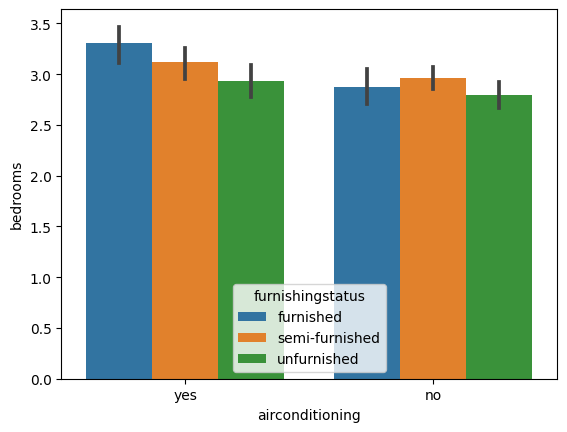

In [11]:
#Data Visualization - Box Plot
import seaborn as sns
sns.barplot(x=df['airconditioning'],y=df['bedrooms'],hue=df["furnishingstatus"])

<Axes: xlabel='hotwaterheating', ylabel='bathrooms'>

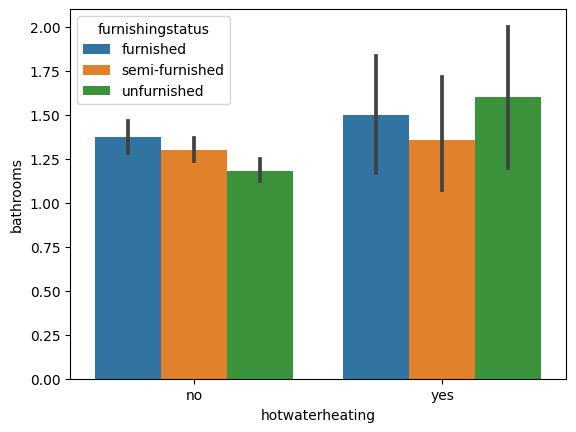

In [12]:
sns.barplot(x=df['hotwaterheating'],y=df['bathrooms'],hue=df["furnishingstatus"])

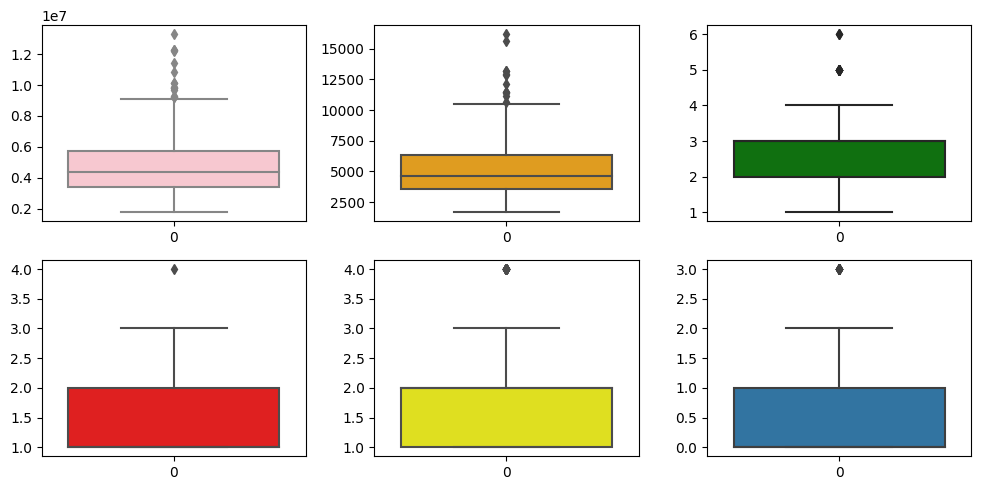

In [23]:
#Bar Plot
fig, axs = plt.subplots(2,3, figsize = (10,5))
plot1 = sns.boxplot(df['price'], ax = axs[0,0],color= 'pink')
plot2 = sns.boxplot(df['area'], ax = axs[0,1],color= 'orange')
plot3 = sns.boxplot(df['bedrooms'], ax = axs[0,2],color= 'green')
plot1 = sns.boxplot(df['bathrooms'], ax = axs[1,0],color= 'red')
plot2 = sns.boxplot(df['stories'], ax = axs[1,1],color= 'yellow')
plot3 = sns.boxplot(df['parking'], ax = axs[1,2])
plt.tight_layout()

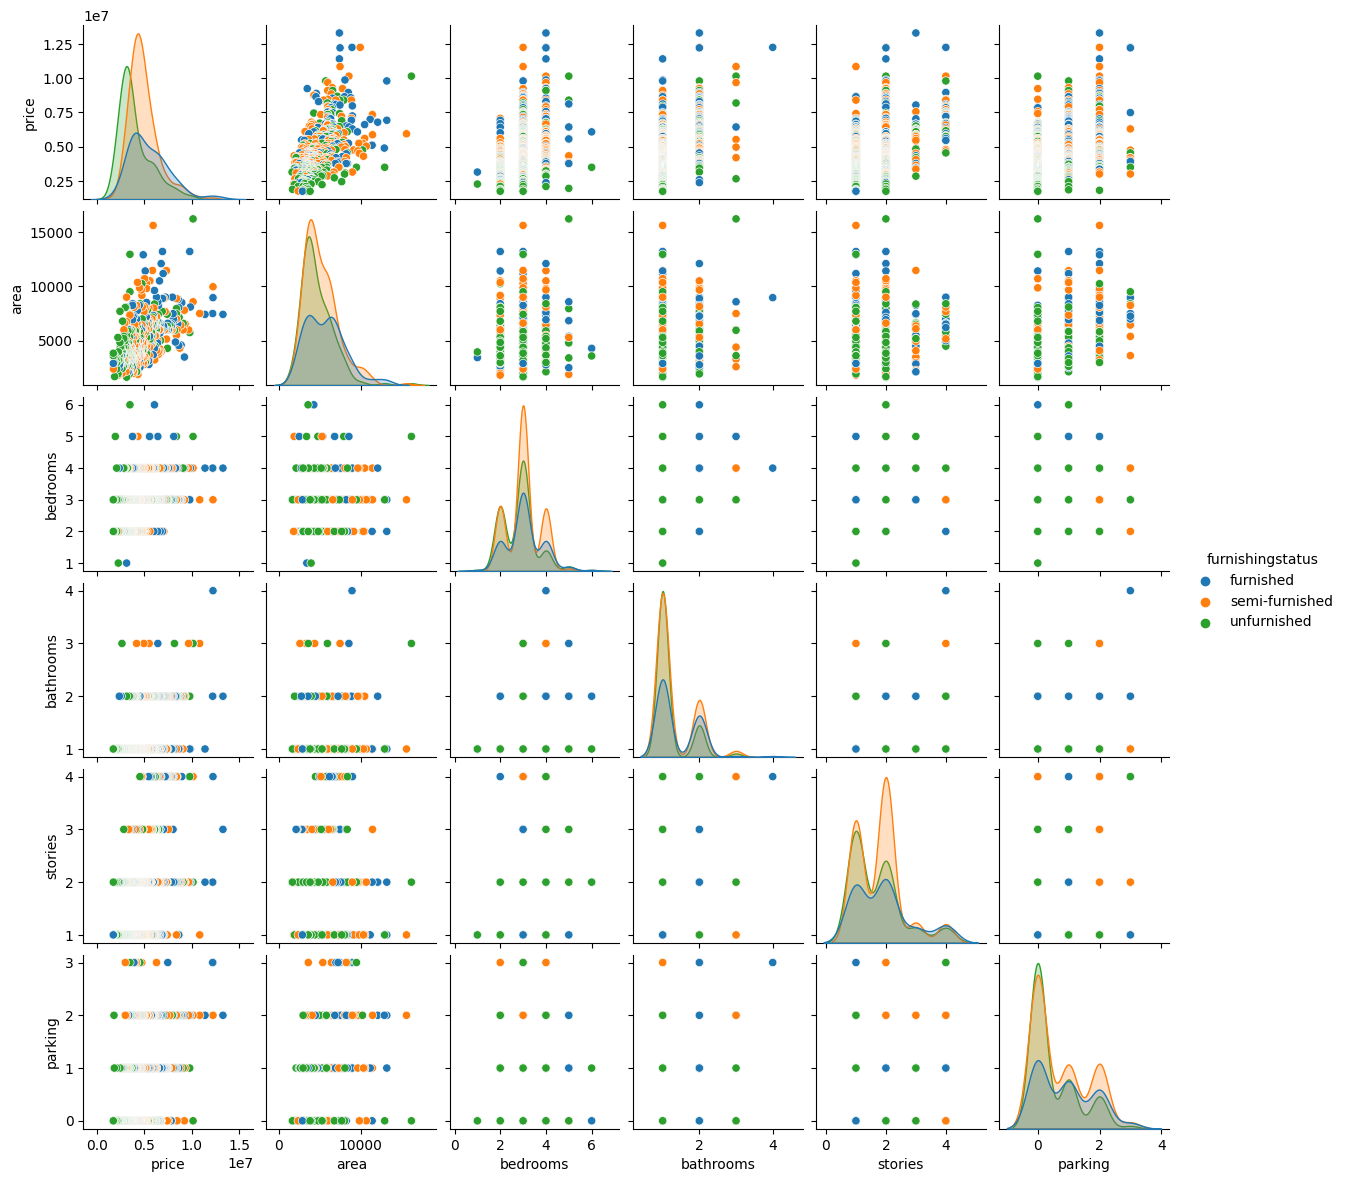

In [35]:
#Pair plots
sns.pairplot(data = df, height = 2,hue="furnishingstatus")

<ipython-input-22-608a5584c4a0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()
<ipython-input-22-608a5584c4a0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(df.corr(), annot=True)


<Axes: >

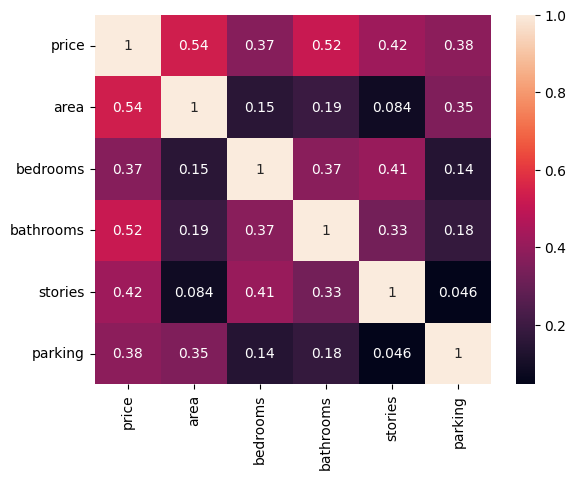

In [ ]:
#Heatmap
sn.heatmap(df.corr(), annot=True)

<ipython-input-24-1020f0d48e68>:1: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cov_matrix = pd.DataFrame.cov(df)


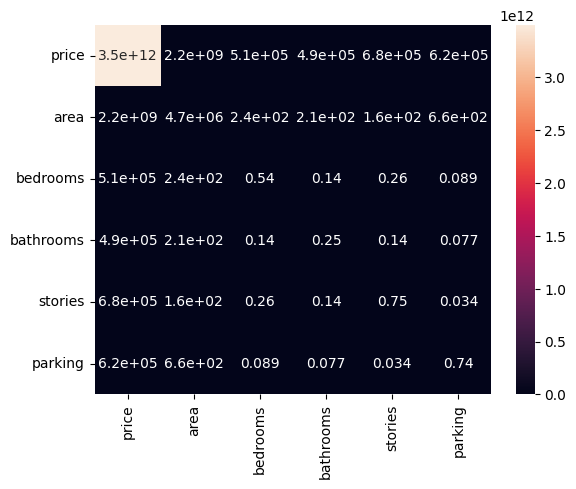

In [ ]:
# Creating a Covariance Matrix
cov_matrix = pd.DataFrame.cov(df)
sn.heatmap(cov_matrix, annot=True)
plt.show()

<Axes: xlabel='area', ylabel='price'>

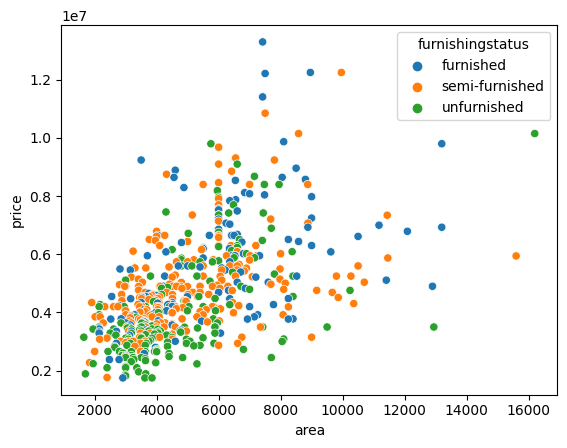

In [25]:
#ScatterPlot
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

<Axes: title={'center': 'price'}, ylabel='Frequency'>

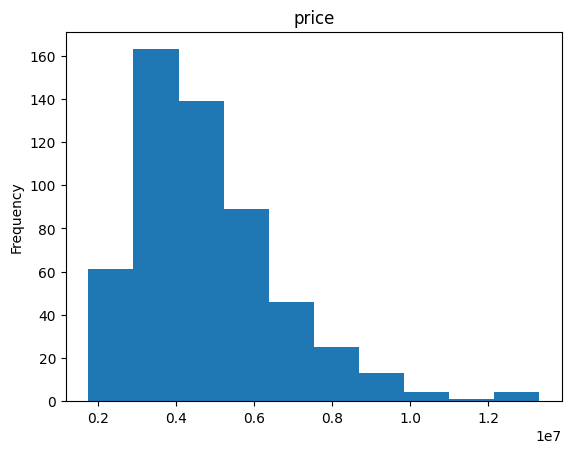

In [34]:
#Histogram
from matplotlib import pyplot as plt
df['price'].plot(kind='hist', bins=10, title='price')

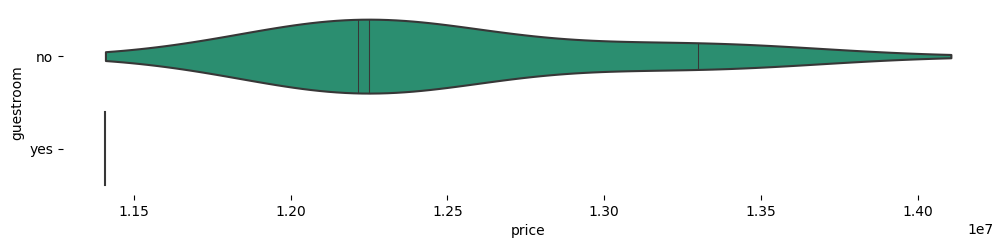

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['guestroom'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='price', y='guestroom', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [36]:
#Adjusting Binary variables
data_train = df.copy()
binary_cols = ['mainroad', 'guestroom','basement','hotwaterheating','airconditioning','prefarea']
for c in binary_cols:
    data_train[c] = data_train[c].replace(to_replace=['yes'], value=1)
    data_train[c] = data_train[c].replace(to_replace=['no'], value=0)

# select categorical features
cat_cols = [c for c in data_train.columns if data_train[c].dtype == 'object'
            and c in ['furnishingstatus']]
cat_data = data_train[cat_cols]
cat_cols

final_data = pd.get_dummies(data_train, columns=cat_cols, drop_first= True)
final_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [37]:
#Applying linear regression since there is only one output varible y = price
y = final_data['price']
X = final_data.drop(columns=['price'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 42)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (381, 13)
Validation Set Dimensions: (164, 13)


In [41]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
126,7160,3,1,1,1,0,1,0,0,2,1,0,1
363,3584,2,1,1,1,0,0,1,0,0,0,1,0
370,4280,2,1,1,1,0,0,0,1,2,0,1,0
31,7000,3,1,4,1,0,0,0,1,2,0,1,0
113,9620,3,1,1,1,0,1,0,0,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,6000,4,2,4,1,0,0,0,1,0,0,0,1
106,5450,4,2,1,1,0,1,0,1,0,1,1,0
270,4500,3,2,3,1,0,0,1,0,1,0,0,0
435,4040,2,1,1,1,0,0,0,0,0,0,0,1


In [43]:
y_train

126    5880000
363    3710000
370    3640000
31     8400000
113    6083000
        ...   
71     6755000
106    6160000
270    4340000
435    3290000
102    6195000
Name: price, Length: 381, dtype: int64

In [40]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
X_train_scaled

array([[0.37869416, 0.4       , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.13292096, 0.2       , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.18075601, 0.2       , 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.19587629, 0.4       , 0.33333333, ..., 0.        , 0.        ,
        0.        ],
       [0.16426117, 0.2       , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.26460481, 0.4       , 0.33333333, ..., 0.        , 1.        ,
        0.        ]])

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso, Ridge
from lightgbm import LGBMRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [53]:
model = {
    'Random Forest Regressor' : RandomForestRegressor(),
    'Gradient Boost Regressor' : GradientBoostingRegressor(),
    'XGBoost' : xgb.XGBRegressor(),
    'Lasso Reg' : Lasso(),
    'Ridge Reg' : Ridge(),
    'Linear Reg': LinearRegression()
}
pred ={}

for name, model in model.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    pred[name]=y_pred


Results for Random Forest Regressor : 
Mean Square Error : 1914338526143.881
R2 Score : 0.5554657178348843


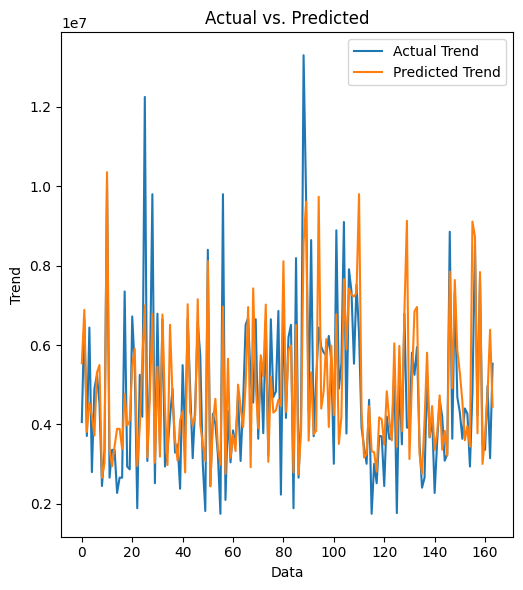

Results for Gradient Boost Regressor : 
Mean Square Error : 1596962032022.6218
R2 Score : 0.629164664005323


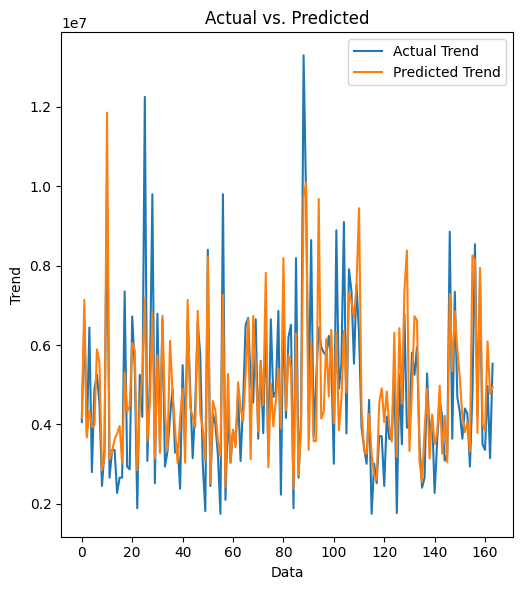

Results for XGBoost : 
Mean Square Error : 2083551385245.621
R2 Score : 0.5161722930687751


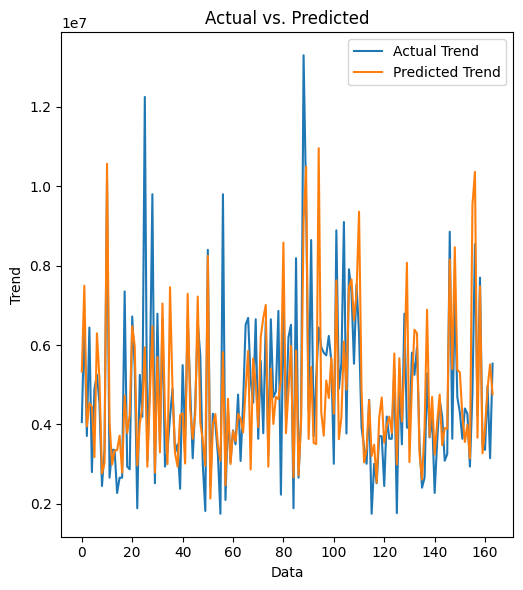

Results for Lasso Reg : 
Mean Square Error : 1523021266984.1904
R2 Score : 0.6463346704907006


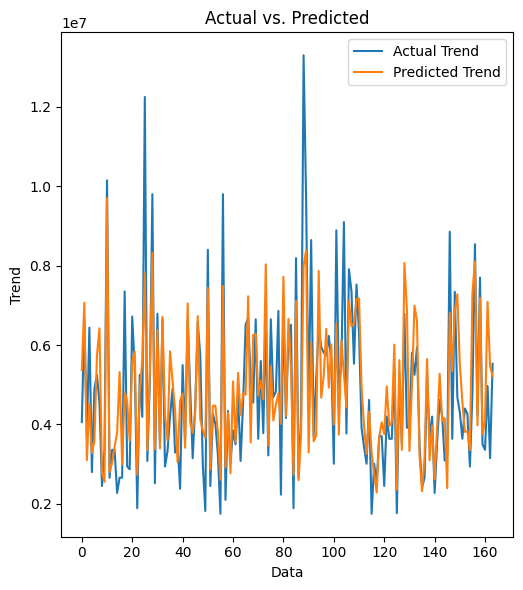

Results for Ridge Reg : 
Mean Square Error : 1525354840593.37
R2 Score : 0.6457927843743898


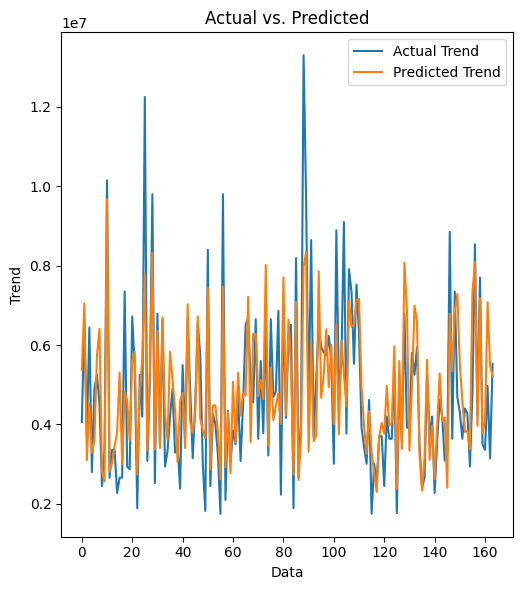

Results for Linear Reg : 
Mean Square Error : 1523019469501.291
R2 Score : 0.6463350878895877


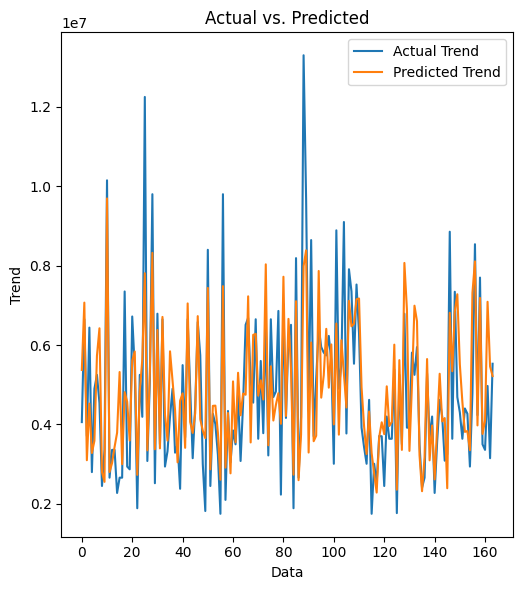

In [59]:
acc= {}
for name, y_pred in pred.items():
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    acc[name] = r2
    print(f"Results for {name} : ")
    print (f"Mean Square Error : {mse}")
    print(f"R2 Score : {r2}")
    plt.figure(figsize=(10, 6))
#plots
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Trend')
    plt.plot(np.arange(len(y_test)), y_pred, label='Predicted Trend')
    plt.xlabel('Data')
    plt.ylabel('Trend')
    plt.legend()
    plt.title('Actual vs. Predicted')

    plt.tight_layout()
    plt.show()

In [60]:
data = pd.DataFrame.from_dict(acc, orient='index', columns=['Accuracy'])
data

,Accuracy
Random Forest Regressor,0.555466
Gradient Boost Regressor,0.629165
XGBoost,0.516172
Lasso Reg,0.646335
Ridge Reg,0.645793
Linear Reg,0.646335


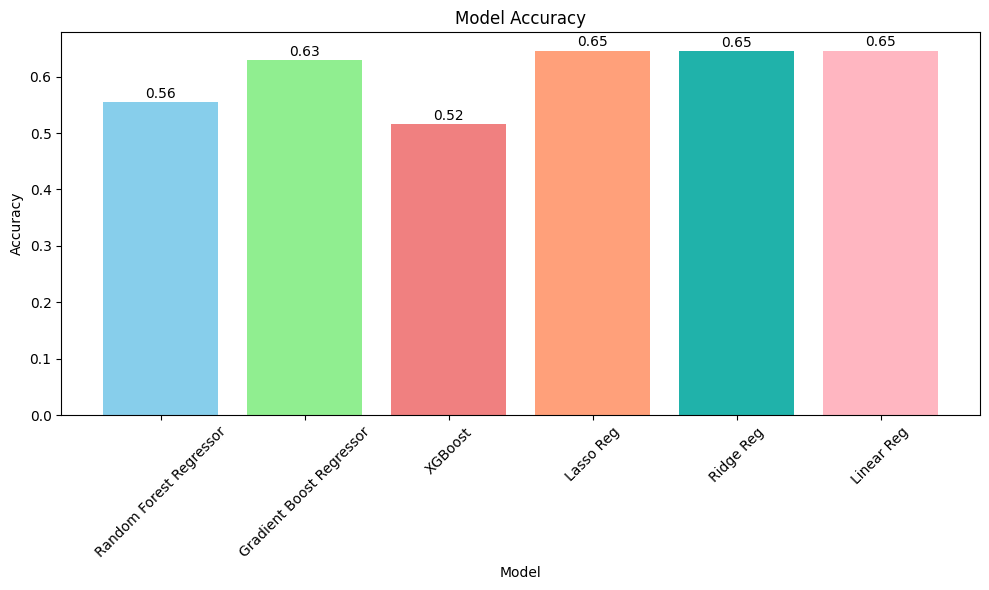

In [61]:
import matplotlib.pyplot as plt

colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightseagreen', 'lightpink', 'lightsteelblue']

plt.figure(figsize=(10, 6))
bars = plt.bar(data.index, data['Accuracy'], color=colors)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.xticks(rotation=45)
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points', ha='center', fontsize=10)

plt.tight_layout()
plt.show()

1079911.6788048318